In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon # to create patches

In [3]:
# define global figure properties used for publication

import matplotlib_inline.backend_inline
# display figues in vector format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# parameter changes
plt.rcParams.update({'font.size':14,
                     'axes.titlelocation': 'left',
                     'axes.spines.right': False,
                     'axes.spines.top': False})

### Figure 3.2: The math of the heart. 

In [4]:
import sympy as sym

In [5]:
x,y = sym.symbols('x,y')
expr = (x**2 + y**2 - 1)**3 - x**2 * y**3

# output
h = sym.plot_implicit(expr, show=False)
h[0]

In [6]:

# # grab midpoints of intervals and plot these
# data = np.array([(x_int.mid, y_int.mid) for x_int, y_int in h[0].get_points()[0]]) # giving an error
# plt.plot(data[:,0],data[:,1], 'k.', markersize=2)
# plt.ticks([-1,0,1])
# plt.axis('square')

# plt.show()

### Figure 3.3: Bar plot of news sources

In [7]:
# bar heights and labels
news_sources = [40,10,85,20]
source_labels = ['TV', 'Newspapers', 'Internet', 'Word of mouth']

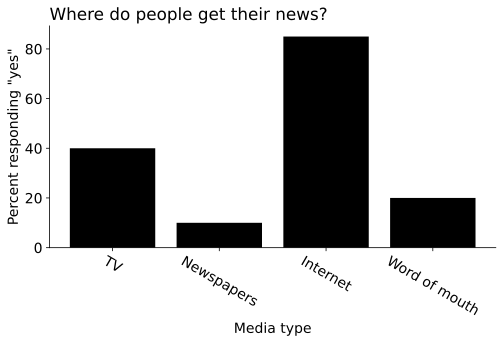

In [8]:
# Plot
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(source_labels, news_sources, color='black')
ax.set_title('Where do people get their news?')
ax.set_xlabel('Media type')
ax.set_ylabel('Percent responding "yes"')

plt.xticks(rotation=-30)

plt.show()

Whooohoo!

### Figure 3.4

In [9]:
Y = [1, 4, 3, 9] # heights
X = [0, 1, 3, 4] # locations

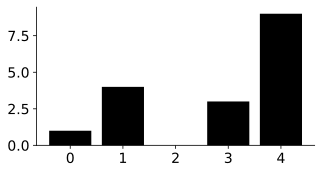

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(5,2.5))

ax.bar(X, Y, color='black')

plt.show()

### Figure 3.5

In [11]:
news_sources = np.array([[12, 17, 95, 35],
                         [90, 40, 50, 25]])
agegroups = ['Millenials', 'Boomers']